

###  AUTOMATIC DETECTION OF HATE SPEECH AND OFFENSIVE LANGUAGE IN SOCIAL MEDIA USING DEEP LEARNING


### Importing the neccessary libraries

In [155]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow_text

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [229]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import gensim.downloader as api
import itertools
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout,Input, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.utils.vis_utils import plot_model
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.models import Word2Vec, FastText, KeyedVectors

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\760676\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\760676\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\760676\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\760676\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Datasets used for the Research

Two datasets was used for this research which can be found here 
- Twitter Hate and Offensive Language Dataset(labelled_data.csv):[link](https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset) The tweets are labelled into three categories which are Hate Speech, Offensive Language and Neither. 
- Twitter Tweets Sentiment Dataset(Tweets.csv):[link](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset) The tweets are labelled into three categories which are Positive, Negative and Neutral

#### Loading the data

In [7]:
# Pandas was used to load the datasets
Twit_df1 =  pd.read_csv('labeled_data.csv')
Twit_df2 =  pd.read_csv('Tweets.csv')

In [8]:
Twit_df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
Twit_df2.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


#### To check the general informations of each of the dataframes

In [10]:
Twit_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [11]:
Twit_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


#### To check for NaN values

In [12]:
Twit_df1.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [13]:
Twit_df2.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

#### Replace the NaN values with the most recurring; mode

In [14]:
text_mode = Twit_df2['text'].mode()[0]
text_mode

'\tREALLY?? oh.. sorry yall  lol'

In [15]:
Twit_df2['text'].fillna(text_mode, inplace=True)

In [16]:
select_mode = Twit_df2['selected_text'].mode()[0]
select_mode

'good'

In [17]:
Twit_df2['selected_text'].fillna(select_mode, inplace=True)

In [18]:
# Double check to see if the NaN have been replaced
Twit_df2.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [19]:
#Twit_df1.value_counts

In [20]:
#Twit_df2['label'].value_counts()

### For Twit_df1 

#### Create a new column for the 'tweets' label and map 'class'.

In [21]:
Twit_df1['label'] = Twit_df1['class'].map({0:'hate_speech',1:'offensive_language',2:'neither'})
Twit_df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language


#### Then reduce the dataframe to the required columns; that is tweet and label

In [22]:
Twit_df1 = Twit_df1[['tweet','label']]
Twit_df1.head()

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language


### For Twit_df2

In [23]:
# Rename the required columns accordingly
Twit_df2 = Twit_df2[['selected_text', 'sentiment']].rename(columns=({'selected_text':'tweet', 'sentiment':'label'}))
Twit_df2.head()

,tweet,label
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


### Data Cleaning

In [24]:
# Defining text cleaning function
def Clean_Text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuations, links, mentions, hashtags
       remove words containing numbers, remove stopwords and apply lemmatization.'''
    text = str(text).lower() # changes texts to lower case
    text = re.sub('\[.*?\]', ' ', text) #removes text in square brackets
    text = re.sub('https?://\S+|www\.\S+', ' ', text) #removes URL
    text = re.sub('rt|cc', ' ', text) #removes rt and cc
    text = re.sub('@\S+', ' ', text) #removes mentions
    text = re.sub('#\S+', ' ', text) #removes hastags
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #removes punctuations
    text = re.sub('\n', ' ', text) #removes newlines
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\s+', ' ', text) #removes extra white spaces

    #removes stopwords
    stop_words = stopwords.words('english') #initialize stopwords object
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)

    #apply lemmatization
    lemmatizer=WordNetLemmatizer() #initialize lemmatizing object
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))

    return text

#### To clean by applying the function above to the two dataframes Twit_df1 and Twit_df2

In [25]:
Twit_df1['Clean_Tweet'] = Twit_df1['tweet'].apply(Clean_Text)
Twit_df1.head()

,tweet,label,Clean_Tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither,woman complain cleaning house amp man always ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,boy dat cold tyga dwn bad cuffin dat hoe place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,dawg ever fuck bitch sta cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,shit hear might true might faker bitch told ya


In [26]:
Twit_df2['Clean_Tweet'] = Twit_df2['tweet'].apply(Clean_Text)
Twit_df2.head()

,tweet,label,Clean_Tweet
0,"I`d have responded, if I were going",neutral,responded going
1,Sooo SAD,negative,sooo sad
2,bullying me,negative,bullying
3,leave me alone,negative,leave alone
4,"Sons of ****,",negative,son


#### Grouping the dataframes by their label and aggregating the count of each group

In [27]:
Agg_count1 = Twit_df1.groupby('label')['label'].agg('count').values
Agg_count1

array([ 1430,  4163, 19190], dtype=int64)

In [28]:
Agg_count2 = Twit_df2.groupby('label')['label'].agg('count').values
Agg_count2

array([ 7781, 11118,  8582], dtype=int64)

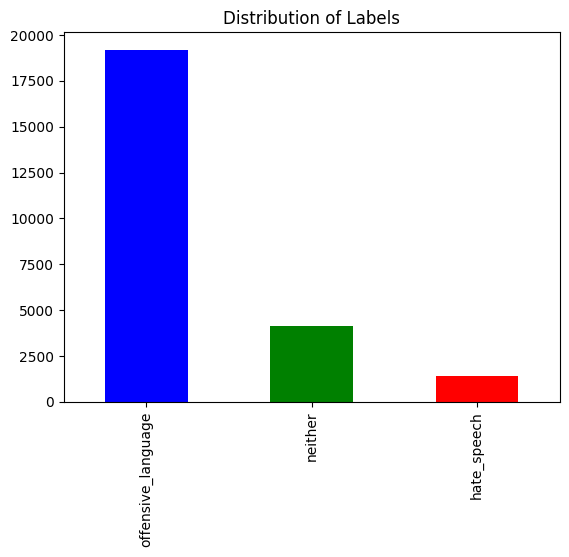

In [29]:
colors = ['blue', 'green', 'red']  # Specifies the colors for each label category

# Creates the bar plot with custom colors
ax = Twit_df1['label'].value_counts().plot(kind='bar', color=colors)
ax.set_title('Distribution of Labels')
plt.show()
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named Twit_df1
# colors = ['blue', 'green', 'red']  # Specify the colors you want for each label category

# # Create the bar plot with custom colors and a title
# ax = Twit_df1['label'].value_counts().plot(kind='bar', color=colors)
# ax.set_title('Distribution of Labels')  # Add a title to the plot

# plt.show()


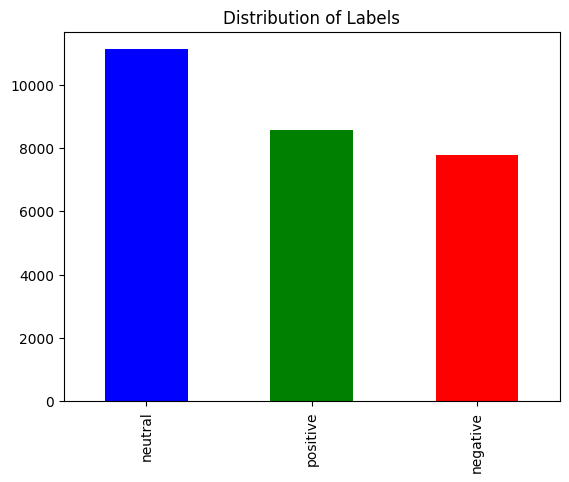

In [30]:
ax = Twit_df2['label'].value_counts().plot(kind='bar', color=colors)
ax.set_title('Distribution of Labels')
plt.show()

In [31]:
# 'Non Offensive' tweets will be categorised by positive, neutral
Non_Offensive_df = Twit_df2[(Twit_df2.label=='neutral')|(Twit_df2.label=='positive')].sample(frac=1).reset_index(drop=True)

Non_Offensive_df.head()

,tweet,label,Clean_Tweet
0,she`s doing good!,positive,good
1,love,positive,love
2,i am going to be staring at hello kitty`s face...,neutral,going staring hello kitty face
3,Bought it. Now I have to wait 2-3 weeks. Bo,neutral,bought wait week bo
4,...you should call school and tell them you ha...,neutral,call school tell swine flu day


In [32]:
Non_Offensive_df.shape

(19700, 3)

In [64]:
#concat tweet_df1 with non_offensive_df to balance labels
Real_Twit_df = pd.concat([Twit_df1, Non_Offensive_df[:17000]], ignore_index=True, sort=False)
Real_Twit_df.head()

,tweet,label,Clean_Tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither,woman complain cleaning house amp man always ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,boy dat cold tyga dwn bad cuffin dat hoe place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,dawg ever fuck bitch sta cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,shit hear might true might faker bitch told ya


In [65]:
# Offensive_df = Twit_df2[(Twit_df2.label=='negative')|(Twit_df1.label=='hate_speech')|(Twit_df1.label=='offensive_language')].sample(frac=1).reset_index(drop=True)
# Offensive_df.head()

In [66]:
# Offensive_df.shape

In [67]:
# # Check the number of rows in both DataFrames
# num_offensive_tweets = len(Offensive_df)
# num_non_offensive_tweets = len(Non_Offensive_df)

# # Randomly select a subset of 'Offensive_df' to match the number of non-offensive tweets
# Offensive_subset = Offensive_df.sample(n=num_non_offensive_tweets, random_state=42)

# # Concatenate the two DataFrames
# Real_Twit_df = pd.concat([Offensive_subset, Non_Offensive_df], ignore_index=True, sort=False)

# Real_Twit_df

In [68]:
# #concatenate the Offensive_df with Non_Offensive_df to balance labels
# Real_Twit_df = pd.concat([Offensive_df, Non_Offensive_df[:16457]], ignore_index=True, sort=False)
# Real_Twit_df.head()

In [69]:
# To rename the labels appropriately
Real_Twit_df.label=Real_Twit_df.label.replace({'positive': 'not_offensive', 'neither': 'not_offensive', 'neutral': 'not_offensive', 'offensive_language':'offensive','hate_speech':'not_offensive'})

In [70]:
# To check for the unique labels in the new dataframe Real_Twit_df
Real_Twit_df.label.unique()

array(['not_offensive', 'offensive'], dtype=object)

In [71]:
Real_Twit_df.shape

(41783, 3)

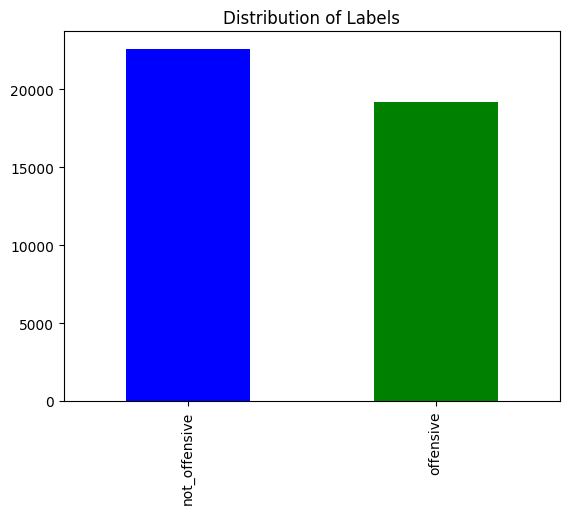

In [72]:
#plot distribution of label classes
Real_Twit_df['label'].value_counts().plot(kind='bar')
ax = Real_Twit_df['label'].value_counts().plot(kind='bar', color=colors)
ax.set_title('Distribution of Labels')
plt.show()

In [73]:
Agg_count3 = Real_Twit_df.groupby('label')['label'].agg('count').values
Agg_count3

array([22593, 19190], dtype=int64)

In [74]:
# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)

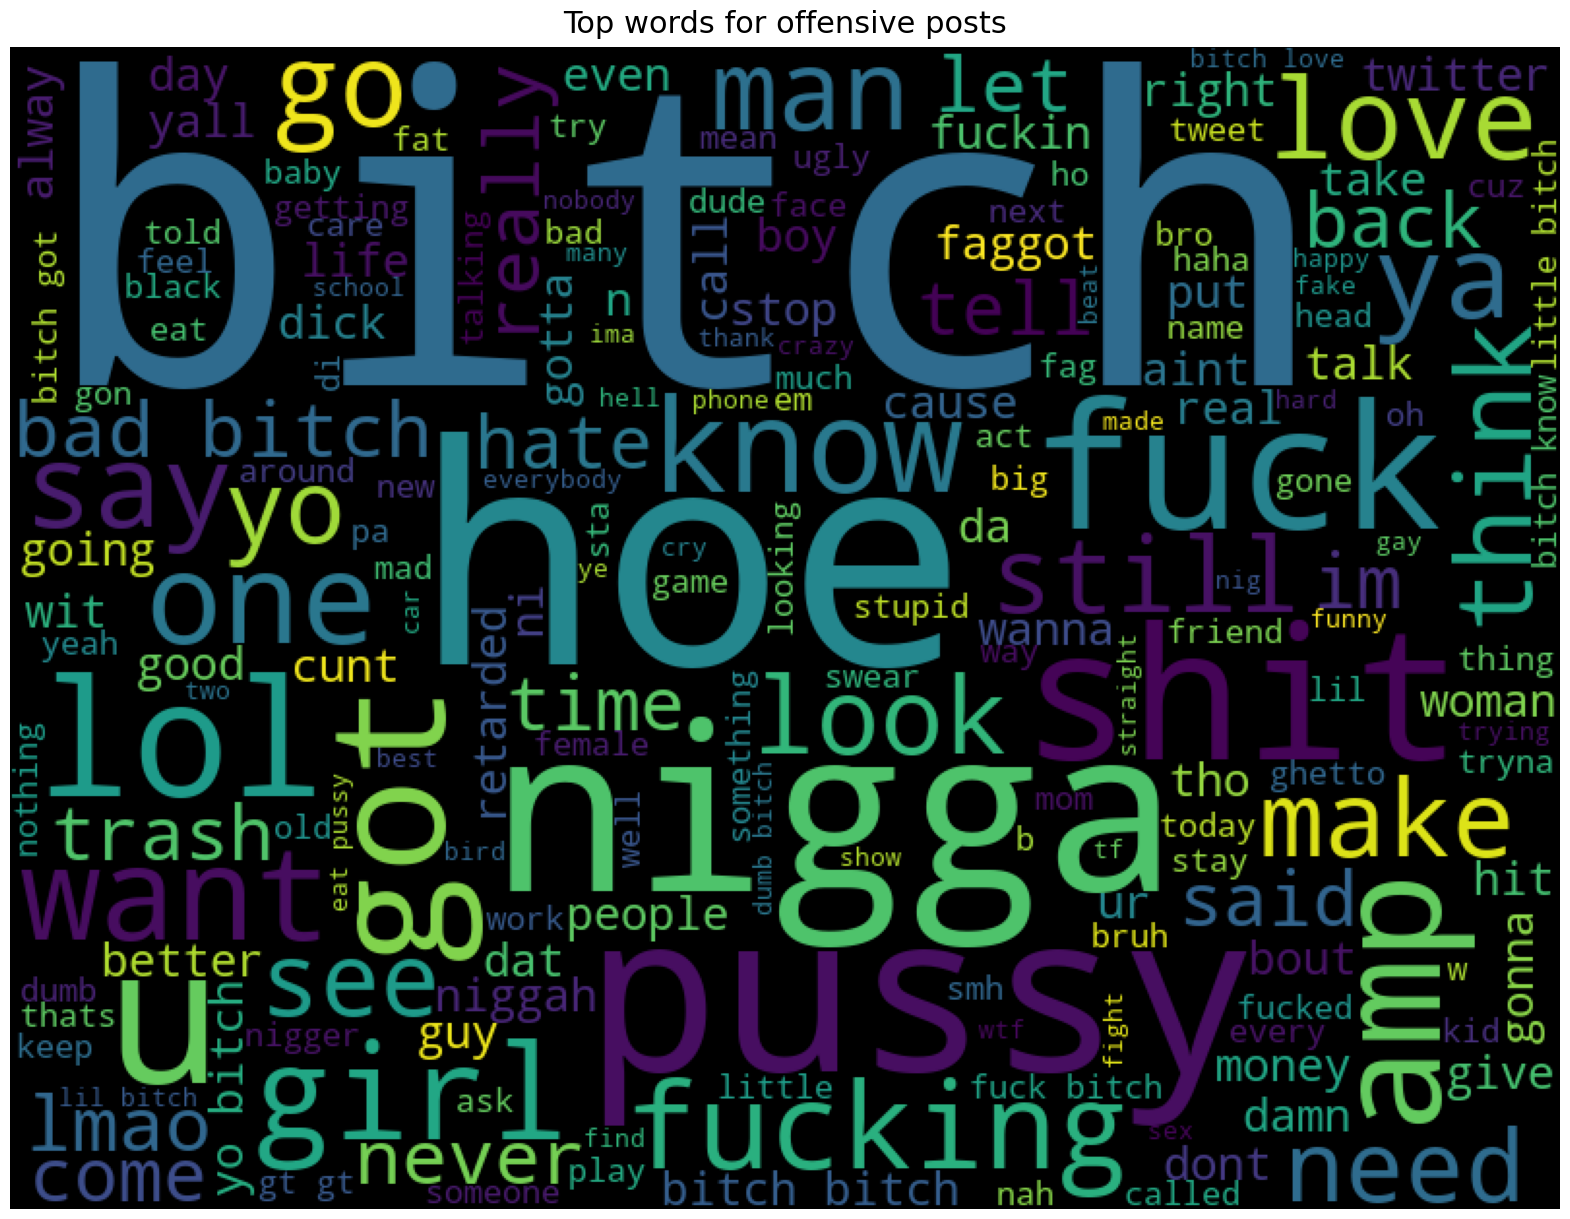

In [75]:
# generate the word cloud visualize top words for offensive posts
text_cloud = wordcloud.generate(" ".join(text for text in Real_Twit_df.loc[Real_Twit_df['label'] == 'offensive', 'Clean_Tweet']))
plt.figure(figsize=(20,30))
plt.title('Top words for offensive posts', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

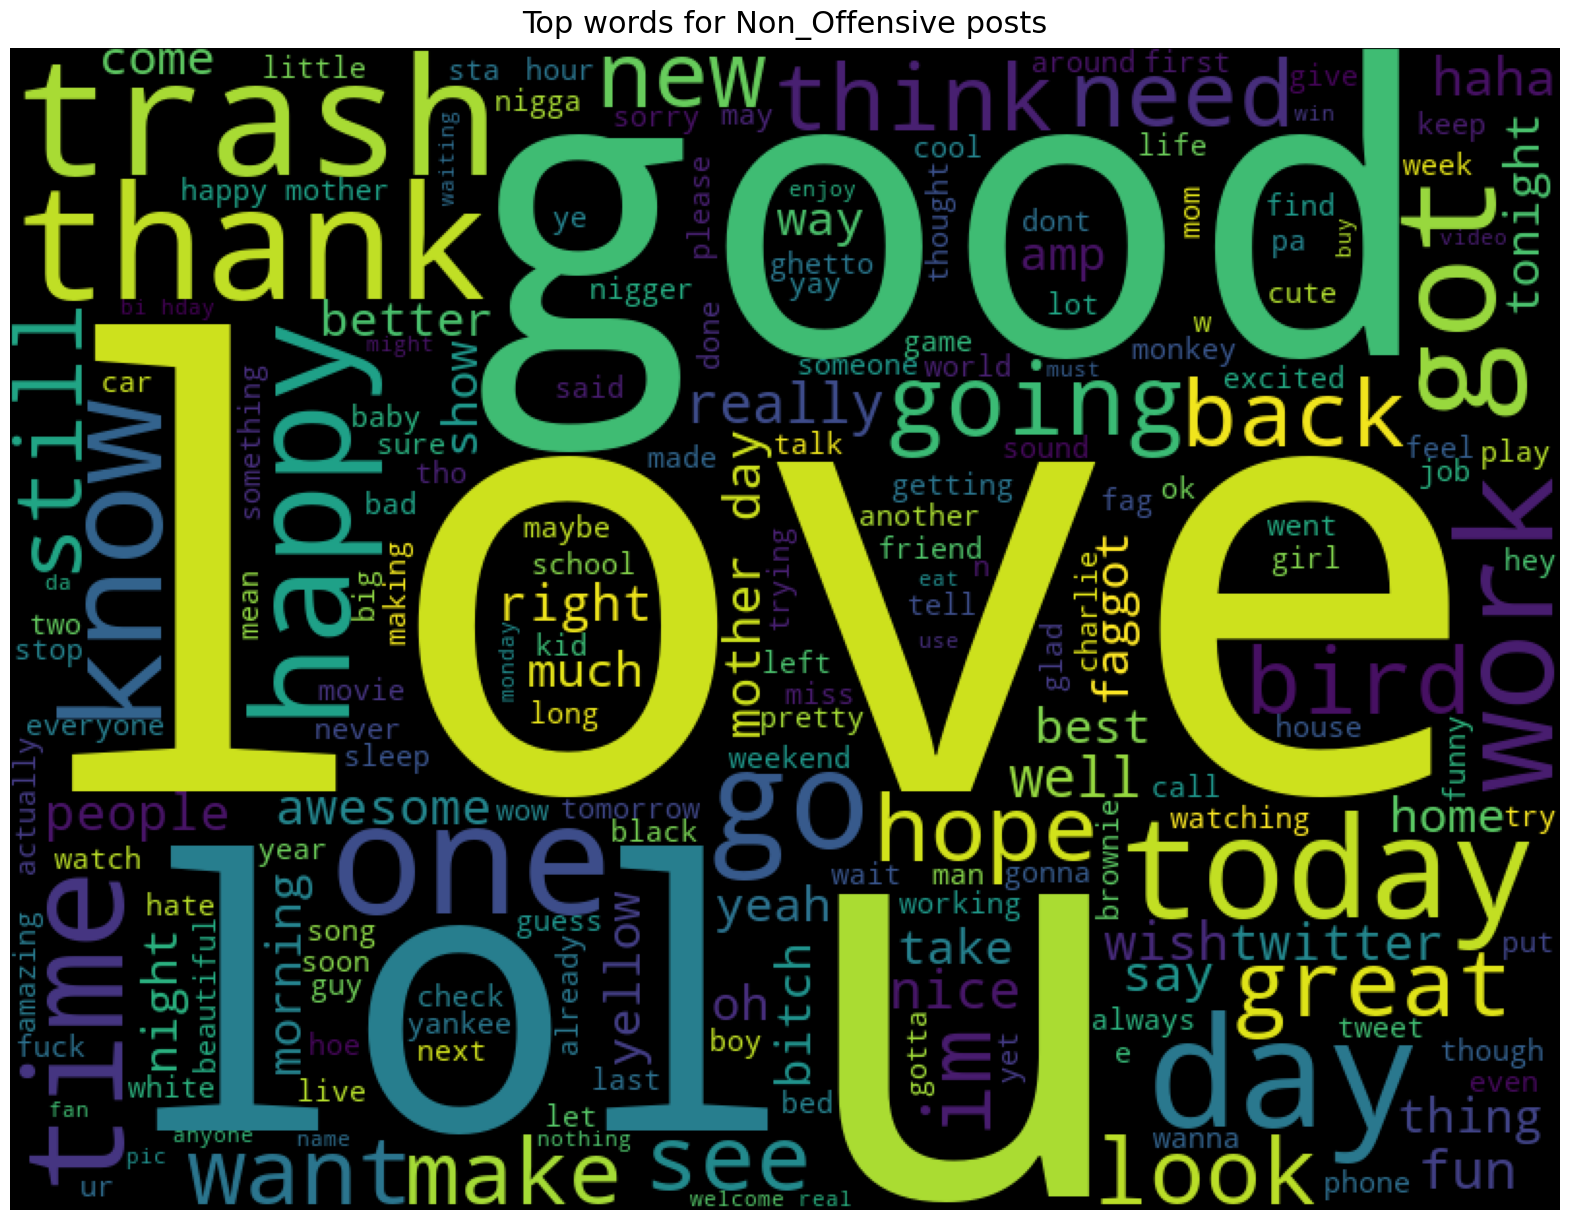

In [76]:
# generate the word cloud visualize top words for Non_Offensive posts
text_cloud = wordcloud.generate(" ".join(text for text in Real_Twit_df.loc[Real_Twit_df['label'] == 'not_offensive', 'Clean_Tweet']))
plt.figure(figsize=(20,30))
plt.title('Top words for Non_Offensive posts', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

In [77]:
#label encode tweet labels into numerical values
le=LabelEncoder()
Real_Twit_df.label=le.fit_transform(Real_Twit_df.label)
Real_Twit_df

,tweet,label,Clean_Tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,woman complain cleaning house amp man always ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,boy dat cold tyga dwn bad cuffin dat hoe place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,dawg ever fuck bitch sta cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,shit hear might true might faker bitch told ya
...,...,...,...
41778,thanks for viewing,0,thanks viewing
41779,92.7 is turning it right about now.,0,turning right
41780,lucky.,0,lucky
41781,"lol! I thought we was suppose to guess..****, ...",0,lol thought suppose guess tried tho lolol


In [78]:
# Label classes
le.classes_

array(['not_offensive', 'offensive'], dtype=object)

# Preprocessing

vectorisation has taken place with the text data. The text is now represented by vectors to enable its processing by the classification models. The algorithms used for vectorisation are stated below :
- Term Frequency Inverse Document Frequency (TFIDF)
- Word embeddings techniques:
    - word2vec
    - GloVe
    - FastText

#### Term Frequency - Inverse Document Frequency (TFIDF)

TF-IDF is a numerical representation of a term's importance in a document within a collection. It takes into account both the frequency of a term within a single document (term frequency) and its rarity across all documents in the collection (inverse document frequency). TF-IDF assigns higher scores to terms that are frequent within a document but relatively rare in the entire corpus.

TIDF is calculated using the following formula:

TIDF(term, document) = Term Frequency (TF) * log ( N / Document Frequency (DF) )

Where:
Term Frequency (TF)- frequency of a term within a document <br>
N- total number of documents in the collection <br>
Document Frequency (DF)- number of documents in the collection that contain the term <br>
log- natural logrithm <br>

In [79]:
# To vectorise the text
tfidf_vectorizer = TfidfVectorizer()
tfidf_preprocesed = tfidf_vectorizer.fit_transform(Real_Twit_df['Clean_Tweet'])

In [80]:
tfidf_preprocesed

<41783x22755 sparse matrix of type '<class 'numpy.float64'>'
	with 245509 stored elements in Compressed Sparse Row format>

#### Word Embeddings
Word embeddings are learned by training a neural network on a large corpus of text data, which predicts the context of a word based on its neighboring words. The learned embeddings are then used to represent words as continuous vectors, where words with similar meanings or contextual usage tend to have similar vector representations.

In [81]:
#word tokenization: split tweets into smaller units (words/tokens)
word_tokens = [word_tokenize(row) for row in Real_Twit_df['Clean_Tweet']]
word_tokens[:5]

[['woman',
  'complain',
  'cleaning',
  'house',
  'amp',
  'man',
  'always',
  'take',
  'trash'],
 ['boy', 'dat', 'cold', 'tyga', 'dwn', 'bad', 'cuffin', 'dat', 'hoe', 'place'],
 ['dawg', 'ever', 'fuck', 'bitch', 'sta', 'cry', 'confused', 'shit'],
 ['look', 'like', 'tranny'],
 ['shit', 'hear', 'might', 'true', 'might', 'faker', 'bitch', 'told', 'ya']]

#### word2vec Technique

Word2Vec are designed to capture the semantic meaning and syntactic relationships between words, allowing algorithms to understand the contextual meaning of words based on their position in the vector space.

In [82]:
# defining word2vec parameters
size = 100 #number of dimensions of the embeddings and the default is 100. default is 100
window = 3 #maximum distance between a target word and words around the target word. default is 5
min_count = 1 #minimum count of words to consider when training the model. default is 1
workers = 3 #number of partitions during training. default workers is 3
sg = 1 #training algorithm, either CBOW(0) or skip gram(1). default is 1

In [83]:
# Training the Word2Vec Model on corpus
w2v_model = Word2Vec(word_tokens,
                     min_count = min_count,
                     vector_size = size,
                     workers = workers,
                     window = window,
                     sg = sg)

In [84]:
# Unique ID of the word
print("Index of the word 'mother':")
print(w2v_model.wv.key_to_index["mother"])

Index of the word 'mother':
96


In [85]:
# To retrieve the embedding of the word: mother
w2v_model.wv.get_vector('mother')

array([-0.6184071 ,  0.33740756,  0.39980125,  0.33080107, -0.28282192,
       -0.7778409 ,  0.29173753,  0.57059073, -0.1544996 , -0.25905877,
        0.22229995, -0.7618084 , -0.2465149 ,  0.16863409, -0.46291918,
       -0.1091428 ,  0.6496864 , -0.54401004, -0.33290532, -0.8158668 ,
        0.6841144 ,  0.32838666,  0.56357807, -0.48697606,  0.30696982,
        0.11518982, -0.63228375, -0.09917367, -0.48418522,  0.14211453,
        0.7649259 ,  0.5659116 ,  0.4689567 , -0.2995627 , -0.39526242,
        0.37028775,  0.06106363, -0.46650624, -0.27560923, -0.49671987,
       -0.25226   , -0.00658556,  0.41780144, -0.30191547,  0.44089818,
       -0.46788585, -0.48999116, -0.38337535,  0.40477648,  0.58075804,
        0.01596962, -0.06959312, -0.08372042,  0.30342522, -0.2997442 ,
        0.1738573 ,  0.18909796, -0.23464495, -0.43695822,  0.35237163,
       -0.17183699,  0.16086453,  0.4051619 , -0.3447469 , -0.6623619 ,
        0.22262694,  0.20085353,  0.17276809, -0.30509564,  0.29

In [86]:
#sample similar words: happy
w2v_model.wv.similar_by_word("happy")

[('hday', 0.9615887999534607),
 ('mother', 0.9487998485565186),
 ('star', 0.9311847686767578),
 ('mom', 0.9309201240539551),
 ('war', 0.926607072353363),
 ('bi', 0.9235137701034546),
 ('mommy', 0.9136812686920166),
 ('mum', 0.8986526131629944),
 ('daaay', 0.8862919807434082),
 ('fucker', 0.8835430145263672)]

In [91]:
#sample similar words: love
w2v_model.wv.similar_by_word("trash")

[('people', 0.8687252402305603),
 ('ghetto', 0.839404821395874),
 ('redneck', 0.8262845873832703),
 ('nigger', 0.8249292969703674),
 ('ppl', 0.8197461366653442),
 ('person', 0.8181802034378052),
 ('retarded', 0.8165639042854309),
 ('men', 0.8154556155204773),
 ('someone', 0.8121148943901062),
 ('retard', 0.8095002174377441)]

In [92]:
# Total number of the words 
print(len(w2v_model.wv.key_to_index))

22769


In [93]:
# Print the count of the word2vec vector for one word
print("Length of the vector generated for a word")
print(len(w2v_model.wv['mother']))

Length of the vector generated for a word
100


In [94]:
# total number of extracted words.
vocab=w2v_model.wv.key_to_index
print("The total number of words extracted are : ",len(vocab))

The total number of words extracted are :  22769


In [95]:
# view samples of the vocabulary
vocab=list(vocab.keys())
vocab[:10]

['bitch', 'hoe', 'like', 'pussy', 'get', 'got', 'nigga', 'u', 'lol', 'love']

In [96]:
#creating a dictionary of the vocabulary
word_vec_dict={}
for word in vocab:
    word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # This should almost equal the vocab size

The no of key-value pairs :  22769


In [97]:
#view vector of word: love
word_vec_dict['happy']

array([-0.38091928,  0.4626149 ,  0.28025362,  0.29520637, -0.3829429 ,
       -0.6815953 ,  0.03541429,  0.50700915, -0.23803517, -0.26291177,
        0.16091947, -0.8325451 , -0.25015286,  0.11910396, -0.08690758,
       -0.04363709,  0.8402271 , -0.4680995 , -0.3087527 , -0.6425859 ,
        0.76466954,  0.43886298,  0.5393819 , -0.55012214, -0.00107425,
        0.29471156, -0.65124524, -0.01440124, -0.30612403,  0.22216898,
        0.83483654,  0.45809698,  0.4047359 , -0.47830877, -0.31988028,
        0.40152636,  0.15171438, -0.3429612 , -0.2887002 , -0.2824409 ,
       -0.15134716,  0.11459077,  0.36107287, -0.28071862,  0.09783046,
       -0.47611523, -0.6277493 , -0.24796832,  0.32302207,  0.36988586,
        0.1382698 , -0.20975684, -0.11377115,  0.2391296 , -0.31322372,
        0.37253508,  0.3010029 , -0.03617455, -0.42712644,  0.10939442,
       -0.24749286,  0.13222648,  0.3007979 , -0.13042083, -0.398802  ,
        0.30059928,  0.34696838,  0.20937271, -0.30306104,  0.39

In [98]:
# Create an embedding_matrix with shape (vocab_size, embedding_dim)
size = 100
embedding_matrix_w2v = np.zeros((len(vocab), size))

# Fill in the embedding_matrix with the corresponding embeddings
for i, word in enumerate(vocab):
    if word in word_vec_dict:
        embedding_matrix_w2v[i] = word_vec_dict[word]
    else:
        # If the word is not in the word2vec vocab dictionary, use a random initialization
        embedding_matrix_w2v[i] = np.random.rand(size)

In [99]:
#embedding matrix
embedding_matrix_w2v

array([[ 0.05098373,  0.08973163,  0.38889727, ..., -0.54764467,
        -0.17543736,  0.32079333],
       [-0.07030057,  0.18734074,  0.36282393, ..., -0.45563596,
        -0.15995219,  0.2460909 ],
       [ 0.05225329,  0.34066036,  0.33607346, ..., -0.22810371,
         0.22517946, -0.06063598],
       ...,
       [-0.02187905,  0.01868149,  0.01473336, ..., -0.03951299,
        -0.01200449,  0.01380377],
       [-0.03253217,  0.03367961,  0.02858246, ..., -0.04115859,
        -0.02957093,  0.03662372],
       [-0.02719478,  0.00966151,  0.00630329, ..., -0.01619476,
        -0.01915765,  0.01180779]])

In [100]:
#embedding matrix shape
embedding_matrix_w2v.shape

(22769, 100)

In [103]:
# Convert the text data into numerical sequences using Word2Vec where values are the keys to the word2vec dictionary
num_sequences_w2v = [] 

for row in Real_Twit_df['Clean_Tweet']:
    num_sequence = []
    for word in row.split():
        if word in w2v_model.wv.key_to_index.keys():
            num_sequence.append(w2v_model.wv.key_to_index[word])
    num_sequences_w2v.append(num_sequence)

In [104]:
#view first record in sequence
num_sequences_w2v[0]

[135, 1221, 997, 202, 21, 39, 88, 64, 18]

In [105]:
#length of sequence: This should be the same length as the dataframe records
len(num_sequences_w2v)

41783

In [106]:
#maximum length in the sequence
max_sequence_length = max(len(sequence) for sequence in num_sequences_w2v)  # maximum length of a tweet/text
max_sequence_length

28

In [107]:
# Padding to have a maximum length of 28
pad_tweets_w2v= pad_sequences(num_sequences_w2v, maxlen=max_sequence_length, padding='post')
pad_tweets_w2v.shape   # note that we had 41240 tweets and we have padded each review to have  a lenght of 28 words.

(41783, 28)

In [108]:
len(pad_tweets_w2v[0])

28

In [109]:
pad_tweets_w2v[0]

array([ 135, 1221,  997,  202,   21,   39,   88,   64,   18,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

#### GloVe Technique

GloVe word embeddings are pre-trained on large text corpora. The idea behind GloVe is that words that have similar meanings or are used in similar contexts tend to occur together frequently in text.

In [114]:
# Loading the pretrained model
glove_model = api.load("glove-twitter-100")

In [113]:
# To retrieve the Unique ID of the word
print("Index of the word 'mother':")
print(glove_model.key_to_index["mother"])

Index of the word 'mother':
1542


In [115]:
# To get the embedding of word: mother
glove_model['mother']

array([ 0.44615  , -0.3426   , -0.16236  ,  0.70221  , -0.0063556,
       -0.66198  ,  0.50239  ,  0.72514  ,  0.40139  , -0.19318  ,
       -0.55705  ,  0.47563  , -3.7614   ,  0.062386 , -0.28429  ,
        0.64277  ,  0.14114  , -0.17907  , -0.084768 ,  0.10419  ,
        0.29275  , -0.56099  , -0.58851  ,  0.30293  ,  0.91432  ,
        0.18194  ,  0.022049 , -0.26197  ,  0.17343  ,  0.13126  ,
        0.088969 , -0.66559  , -0.038818 ,  0.23208  , -0.55856  ,
        1.2076   ,  0.41975  ,  0.43664  , -0.18751  , -0.046753 ,
       -0.23344  ,  0.15437  ,  0.14866  ,  0.11116  ,  0.31672  ,
        0.23532  ,  0.73886  ,  0.32192  ,  0.27266  ,  0.26554  ,
       -0.41621  ,  0.0088457, -0.035569 , -0.51636  ,  0.27591  ,
       -0.26439  , -0.13055  ,  0.27277  , -0.16856  ,  0.48667  ,
       -0.21558  ,  0.33781  ,  0.6418   , -0.1669   , -0.1454   ,
        0.55402  , -0.19883  , -0.2383   ,  0.1369   ,  0.20284  ,
        0.096421 , -0.7681   , -0.1644   ,  0.012845 ,  0.5450

In [117]:
# To sample similar words: wmother
glove_model.most_similar('mother')

[('father', 0.8628987073898315),
 ('mom', 0.830894410610199),
 ('daughter', 0.825946569442749),
 ('sister', 0.8042389750480652),
 ('grandma', 0.8018855452537537),
 ('dad', 0.801167905330658),
 ('wife', 0.7823758125305176),
 ('woman', 0.781503438949585),
 ('mothers', 0.7698018550872803),
 ('child', 0.761625349521637)]

In [118]:
# The total number of extracted words
vocab_glove=glove_model.key_to_index
print("The total number of words are : ",len(vocab_glove))

The total number of words are :  1193514


In [119]:
# To create a dictionary of the vocabulary
glove_dict={}
for word in vocab_glove:
    glove_dict[word]=glove_model.get_vector(word)
print("The no of key-value pairs : ",len(glove_dict)) # should come equal to vocab size

The no of key-value pairs :  1193514


In [120]:
# Create an embedding_matrix with shape (vocab_size, embedding_dim)
embedding_dim = 100
embedding_matrix_glove = np.zeros((len(vocab_glove), embedding_dim))

# Fill in the embedding_matrix with the corresponding embeddings
for i, word in enumerate(vocab_glove):
    if word in glove_dict:
        embedding_matrix_glove[i] = glove_dict[word]
    else:
        # If the word is not in the GloVe vocab dictionary, use a random initialization
        embedding_matrix_glove[i] = np.random.rand(embedding_dim)

In [121]:
#embedding matrix
embedding_matrix_glove

array([[ 0.63006002,  0.65177   ,  0.25545001, ...,  0.55096   ,
         0.64705998, -0.60930002],
       [ 0.18205   , -0.048483  ,  0.23965999, ..., -0.33579999,
         0.18884   , -0.40786001],
       [ 1.06739998,  0.45716   ,  0.51463002, ...,  0.13974001,
         0.76486999, -0.17314   ],
       ...,
       [ 0.28891999,  0.25407001,  0.11113   , ..., -0.61580002,
         0.046846  , -0.086387  ],
       [-0.38313001,  0.064609  ,  0.27384001, ..., -0.16395999,
        -0.26971   , -0.69941002],
       [-0.028777  , -0.72606999, -0.82770002, ..., -0.69694   ,
        -0.76516998, -1.09010005]])

In [122]:
#embedding matrix
embedding_matrix_glove.shape

(1193514, 100)

In [123]:
# to convert the text data into numerical sequences using GloVe where values are the keys to the GloVe dictionary
num_sequences_glove = [] 

for row in Real_Twit_df['Clean_Tweet']:
    num_sequence = []
    for word in row.split():
        if word in glove_model:
            num_sequence.append(glove_model.key_to_index[word])
    num_sequences_glove.append(num_sequence)

In [124]:
# To view the first record in sequence
num_sequences_glove[0]

[1240, 5032, 5639, 543, 12800, 246, 245, 284, 6740]

In [125]:
#To retrieve the length of sequence. This is the same as dataframe records
len(num_sequences_glove)

41783

In [126]:
# to retrieve the maximum length in the sequence
Max_seq_len=max(len(sequence) for sequence in num_sequences_glove)
Max_seq_len

28

In [127]:
# Padding to have a maximum length of 28
pad_tweets_glove= pad_sequences(num_sequences_glove, maxlen=Max_seq_len, padding='post')
pad_tweets_glove.shape

(41783, 28)

In [128]:
pad_tweets_glove[0]

array([ 1240,  5032,  5639,   543, 12800,   246,   245,   284,  6740,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

#### FastText Technique
The key feature of FastText is its ability to handle Out-Of-Vocabulary (OOV) words, which are words that do not appear in the training data. FastText uses a combination of traditional natural language processing (NLP) techniques and machine learning algorithms to represent words and text as continuous vectors.

In [129]:
# To train the FastText model on training data
fasttext_model =FastText(vector_size=100, window=3, min_count=1) # instantiate
fasttext_model.build_vocab(corpus_iterable=word_tokens)
fasttext_model.train(corpus_iterable=word_tokens, total_examples=len(word_tokens), epochs=10) 

(2314338, 2593950)

In [130]:
# Unique ID of the word
print("Index of the word 'happy':")
print(fasttext_model.wv.get_index('happy'))

Index of the word 'happy':
23


In [131]:
# To sample similar words: love
fasttext_model.wv.most_similar('happy')

[('unhappy', 0.9932819604873657),
 ('nyappy', 0.9928326606750488),
 ('happpppy', 0.986731767654419),
 ('happppppy', 0.9840956330299377),
 ('happymothersday', 0.9835580587387085),
 ('eppy', 0.9829362630844116),
 ('hdm', 0.9819668531417847),
 ('happ', 0.9797489047050476),
 ('pappy', 0.977532684803009),
 ('hdayyyy', 0.9762575030326843)]

In [132]:
# The total number of extracted words
vocab_fasttext=fasttext_model.wv.key_to_index
print("The total number of extracted words are : ",len(vocab_fasttext))

The total number of extracted words are :  22769


In [133]:
# To create a dictionary of the vocabulary
fasttext_dict={}
for word in vocab_fasttext.keys():
    fasttext_dict[word]=fasttext_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(fasttext_dict)) # should be equal to vocabulary size

The no of key-value pairs :  22769


In [134]:
# To create an embedding_matrix with shape (vocab_size, embedding_dim)
size = 100
embedding_matrix_fasttext = np.zeros((len(vocab_fasttext), size))

# Fill in the embedding_matrix with the corresponding embeddings
for i, word in enumerate(fasttext_dict.keys()):
    if word in fasttext_dict:
        embedding_matrix_fasttext[i] = fasttext_dict[word]
    else:
        # If the word is not in the word2vec vocab dictionary, use a random initialization
        embedding_matrix_fasttext[i] = np.random.rand(size)

In [138]:
# To convert the text data into numerical sequences using Fasttext where values are the keys to the word2vec dictionary
num_sequences_fasttext = [] 

for row in Real_Twit_df['Clean_Tweet']:
    num_sequence = []
    for word in row.split():
        if word in fasttext_model.wv.key_to_index.keys():
            num_sequence.append(fasttext_model.wv.key_to_index[word])
    num_sequences_fasttext.append(num_sequence)

In [139]:
# To view the first record in the sequence
num_sequences_fasttext[0]

[135, 1221, 997, 202, 21, 39, 88, 64, 18]

In [140]:
#maximum length in the sequence
max_seq_len = max(len(sequence) for sequence in num_sequences_fasttext)  # max length of a tweet/text
max_seq_len

28

In [141]:
# now padding to have a maximum length of 28
pad_tweets_fasttext= pad_sequences(num_sequences_fasttext, maxlen=max_sequence_length, padding='post')
pad_tweets_fasttext.shape 

(41783, 28)

In [142]:
pad_tweets_fasttext[0]

array([ 135, 1221,  997,  202,   21,   39,   88,   64,   18,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

### BUILDING THE MODEL
The models below will be used in this research. The classifcation architecture wil be designed and fitted on the training data.

- Support Vector Machine (SVM) This is the baseline model
- Bidirectional Long short-term memory (BiLSTM)
- Bidirectional Encoder Representations from Transformers (BERT) 

In [143]:
# Defining hyperparameters
dropout=0.2
num_classes = 2
learning_rate_rnn = 0.001
learning_rate_bert=3e-5
batch_size = 64
epochs = 10
steps_per_epoch=100

### Support Vector Machines
SVM is a widely used machine learning algorithm for classification and regression. It's a supervised method effective for binary and multi-class tasks. SVM finds the best hyperplane to separate classes, maximizing the margin between them.

In [144]:
#split data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(tfidf_preprocesed, Real_Twit_df['label'], test_size=0.2, random_state=42)

In [145]:
# Initialize model
svm_model = SVC(C=1.0, kernel='linear')

#train model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Recurrent Neural Network Architecture: BiLSTM
BiLSTM is an advanced RNN used for sequential data tasks like NLP and speech. It processes data in both directions to capture past and future context, making it effective for tasks needing bidirectional understanding, like sequence labeling.

#### Preparing and Splitting the data

In [147]:
# Preparing the data for the model
y=tf.keras.utils.to_categorical(Real_Twit_df['label'])  # one hot target as required by neural network.
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [148]:
#split w2v embedded data into train and test dataset
x_train1,x_test1,y_train1,y_test1=train_test_split(pad_tweets_w2v,y,test_size=0.20,random_state=42)

In [149]:
#split glove embedded data into train and test dataset
x_train2,x_test2,y_train2,y_test2=train_test_split(pad_tweets_glove,y,test_size=0.20,random_state=42)

In [150]:
#split glove embedded data into train and test dataset
x_train3,x_test3,y_train3,y_test3=train_test_split(pad_tweets_fasttext,y,test_size=0.20,random_state=42)

In [151]:
# Defining the hyperparameters
vocab_size_w2v = len(w2v_model.wv.key_to_index) # total no of words w2v
vocab_size_glove = len(glove_model.key_to_index) # total no of words glove
vocab_size_fasttext = len(fasttext_model.wv.key_to_index) # total no of words fasttext
embed_dim_w2v=w2v_model.vector_size # embedding dimension as choosen in word2vec constructor
embed_dim_glove=glove_model.vector_size # embedding dimension as choosen in Glove constructor
embed_dim_fasttext=fasttext_model.vector_size # embedding dimension as choosen in Glove constructor

In [152]:
print(f'The vocabulary size for w2v:{vocab_size_w2v}')
print(f'The vocabulary size for glove:{vocab_size_glove}')
print(f'The vocabulary size foThe maximum sequence lengthr fasttext:{vocab_size_fasttext}')
print(f'The embeded dimension for w2v:{embed_dim_w2v}')
print(f'eThe embeded dimension for glove:{embed_dim_glove}')
print(f'The embeded dimension for fasttext:{embed_dim_fasttext}')
print(f'The maximum sequence length:{max_sequence_length}')

The vocabulary size for w2v:22769
The vocabulary size for glove:1193514
The vocabulary size foThe maximum sequence lengthr fasttext:22769
The embeded dimension for w2v:100
eThe embeded dimension for glove:100
The embeded dimension for fasttext:100
The maximum sequence length:28


### Word2Vec + LSTM

In [ ]:
model.add(LSTM(units=64, use_cudnn=False))

In [233]:
# Defining the model architecture :LSTM
lstm1 = Sequential()
lstm1.add(Embedding(input_dim=vocab_size_w2v, output_dim=embed_dim_w2v, weights=[embedding_matrix_w2v], input_length=max_sequence_length, trainable=False))
lstm1.add(Bidirectional(LSTM(units=128, return_sequences=True, dropout=dropout, recurrent_dropout=dropout)))
lstm1.add(Bidirectional(LSTM(units=256, dropout=dropout, recurrent_dropout=dropout)))
lstm1.add(Dense(units=512, activation='relu'))
lstm1.add(Dropout(dropout))
lstm1.add(Dense(units=num_classes, activation='softmax'))

lstm1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_rnn),loss='categorical_crossentropy',metrics=['accuracy'])
lstm1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 28, 100)           2276900   
                                                                 
 bidirectional_8 (Bidirectio  (None, 28, 256)          234496    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                

In [225]:
tf.keras.utils.plot_model(lstm1, to_file="LSTM1.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [166]:
plot_model(lstm2, to_file="LSTM2.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [156]:
# Setting up Call backS 
es = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,verbose=1)
cb = [es]

In [157]:
# Model fitting 
lstm_hist1=lstm1.fit(x_train1,y_train1,epochs=epochs,steps_per_epoch=steps_per_epoch,batch_size=batch_size,callbacks=cb,validation_data=(x_test1,y_test1))

Epoch 1/10
100/100 [==============================] - 100s 886ms/step - loss: 0.5873 - accuracy: 0.6834 - val_loss: 0.5254 - val_accuracy: 0.7519
Epoch 2/10
100/100 [==============================] - 88s 886ms/step - loss: 0.4367 - accuracy: 0.8139 - val_loss: 0.3812 - val_accuracy: 0.8423
Epoch 3/10
100/100 [==============================] - 89s 891ms/step - loss: 0.3776 - accuracy: 0.8456 - val_loss: 0.3321 - val_accuracy: 0.8808
Epoch 4/10
100/100 [==============================] - 89s 886ms/step - loss: 0.3509 - accuracy: 0.8636 - val_loss: 0.3100 - val_accuracy: 0.8829
Epoch 5/10
100/100 [==============================] - 88s 881ms/step - loss: 0.3352 - accuracy: 0.8727 - val_loss: 0.3075 - val_accuracy: 0.8801
Epoch 6/10
100/100 [==============================] - 88s 882ms/step - loss: 0.3193 - accuracy: 0.8750 - val_loss: 0.2986 - val_accuracy: 0.8827
Epoch 7/10
100/100 [==============================] - 88s 881ms/step - loss: 0.3476 - accuracy: 0.8633 - val_loss: 0.2975 - val_a

### GloVe + LSTM

In [160]:
# Defining the Model Architecture
lstm2 = Sequential()
lstm2.add(Embedding(input_dim=vocab_size_glove, output_dim=embed_dim_glove, weights=[embedding_matrix_glove], input_length=max_sequence_length, trainable=False))
lstm2.add(Bidirectional(LSTM(units=128, return_sequences=True, dropout=dropout, recurrent_dropout=dropout)))
lstm2.add(Bidirectional(LSTM(units=256, dropout=dropout, recurrent_dropout=dropout)))
lstm2.add(Dense(units=512, activation='relu'))
lstm2.add(Dropout(dropout))
lstm2.add(Dense(units=num_classes, activation='softmax'))

lstm2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_rnn),loss='categorical_crossentropy',metrics=['accuracy'])
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 100)           119351400 
                                                                 
 bidirectional_2 (Bidirectio  (None, 28, 256)          234496    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [161]:
tf.keras.utils.plot_model(lstm2, to_file="LSTM2.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [168]:
# Setting up Call backs
es = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,verbose=1)
cb = [es]

In [169]:
# Model fitting 
lstm_hist2=lstm2.fit(x_train2,y_train2,epochs=epochs,steps_per_epoch=steps_per_epoch,batch_size=batch_size,callbacks=cb,validation_data=(x_test2,y_test2))

Epoch 1/10
100/100 [==============================] - 89s 885ms/step - loss: 0.1668 - accuracy: 0.9367 - val_loss: 0.1572 - val_accuracy: 0.9397
Epoch 2/10
100/100 [==============================] - 89s 892ms/step - loss: 0.1553 - accuracy: 0.9414 - val_loss: 0.1518 - val_accuracy: 0.9470
Epoch 3/10
100/100 [==============================] - 90s 898ms/step - loss: 0.1676 - accuracy: 0.9381 - val_loss: 0.1482 - val_accuracy: 0.9418
Epoch 4/10
100/100 [==============================] - 89s 893ms/step - loss: 0.1708 - accuracy: 0.9325 - val_loss: 0.1465 - val_accuracy: 0.9468
Epoch 5/10
100/100 [==============================] - 90s 897ms/step - loss: 0.1550 - accuracy: 0.9425 - val_loss: 0.1438 - val_accuracy: 0.9488
Epoch 6/10
100/100 [==============================] - 89s 893ms/step - loss: 0.1500 - accuracy: 0.9459 - val_loss: 0.1399 - val_accuracy: 0.9491
Epoch 7/10
100/100 [==============================] - 89s 892ms/step - loss: 0.1463 - accuracy: 0.9458 - val_loss: 0.1385 - val_ac

### FastText + LSTM

In [170]:
# Defining the Model Architecture
lstm3 = Sequential()
lstm3.add(Embedding(input_dim=vocab_size_fasttext, output_dim=embed_dim_fasttext, weights=[embedding_matrix_fasttext], input_length=max_sequence_length, trainable=False))
lstm3.add(Bidirectional(LSTM(units=128, return_sequences=True, dropout=dropout, recurrent_dropout=dropout)))
lstm3.add(Bidirectional(LSTM(units=256, dropout=dropout, recurrent_dropout=dropout)))
lstm3.add(Dense(units=512, activation='relu'))
lstm3.add(Dropout(dropout))
lstm3.add(Dense(units=num_classes, activation='softmax'))

lstm3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_rnn),loss='categorical_crossentropy',metrics=['accuracy'])
lstm3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 28, 100)           2276900   
                                                                 
 bidirectional_4 (Bidirectio  (None, 28, 256)          234496    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [ ]:
tf.keras.utils.plot_model(lstm3, to_file = 'LSTM3.png')

In [171]:
# Setting up Call backs
es = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,verbose=1)
cb = [es]

In [172]:
# Model fitting
lstm_hist3=lstm3.fit(x_train3,y_train3,epochs=epochs,steps_per_epoch=steps_per_epoch,batch_size=batch_size,callbacks=cb,validation_data=(x_test3,y_test3))

Epoch 1/10
100/100 [==============================] - 97s 884ms/step - loss: 0.5598 - accuracy: 0.7147 - val_loss: 0.4006 - val_accuracy: 0.8340
Epoch 2/10
100/100 [==============================] - 88s 885ms/step - loss: 0.3991 - accuracy: 0.8441 - val_loss: 0.3786 - val_accuracy: 0.8422
Epoch 3/10
100/100 [==============================] - 89s 890ms/step - loss: 0.3476 - accuracy: 0.8673 - val_loss: 0.3440 - val_accuracy: 0.8641
Epoch 4/10
100/100 [==============================] - 88s 885ms/step - loss: 0.3257 - accuracy: 0.8759 - val_loss: 0.3063 - val_accuracy: 0.8809
Epoch 5/10
100/100 [==============================] - 89s 893ms/step - loss: 0.3187 - accuracy: 0.8767 - val_loss: 0.3012 - val_accuracy: 0.8813
Epoch 6/10
100/100 [==============================] - 89s 888ms/step - loss: 0.3044 - accuracy: 0.8867 - val_loss: 0.2989 - val_accuracy: 0.8861
Epoch 7/10
100/100 [==============================] - 89s 887ms/step - loss: 0.3128 - accuracy: 0.8766 - val_loss: 0.3005 - val_ac

### BERT
BERT uses an attention mechanism (transformer) to grasp words' contextual meaning within sentences when creating word embeddings. Unlike traditional NLP models, BERT considers the whole sentence context instead of just neighboring words.

In [175]:
# To prepare data for the model
Tee_data = Real_Twit_df['Clean_Tweet'].to_numpy()
Tee_label = tf.keras.utils.to_categorical(Real_Twit_df['label'])

In [176]:
#split data into train and test dataset
x_train4,x_test4,y_train4,y_test4=train_test_split(Tee_data,Tee_label,test_size=0.20,random_state=42)

In [177]:
#preprocessing model
tfhub_handle_preprocess='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [178]:
# Encoder model
tfhub_handle_encoder='https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [179]:
# Defining the Model
def build_classifier_model():
  text_input = Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='BERT_preprocessor')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = Dropout(dropout)(net)
  net = Dense(512, activation='relu', name='Dense_layer')(net)
  net = Dropout(dropout)(net)
  net = Dense(2, activation='softmax', name='classifier')(net)
  return Model(text_input, net)

In [238]:
# Instantiate and Compile the Model
Bert = build_classifier_model()
Bert.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_bert),loss='categorical_crossentropy',metrics=['accuracy'])
Bert.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 BERT_preprocessor (KerasLayer)  {'input_type_ids':   0          ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [227]:
tf.keras.utils.plot_model(Bert, to_file="BERT.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [183]:
# Setting up the Call backs
es = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,verbose=1)
cb = [es]

In [185]:
# Fitting the Model.
bert_hist=Bert.fit(x_train4,y_train4,epochs=epochs,steps_per_epoch=steps_per_epoch,batch_size=batch_size,callbacks=cb,validation_data=(x_test4,y_test4))

Epoch 1/10
100/100 [==============================] - 98s 901ms/step - loss: 0.3546 - accuracy: 0.8448 - val_loss: 0.1977 - val_accuracy: 0.9269
Epoch 2/10
100/100 [==============================] - 90s 901ms/step - loss: 0.1949 - accuracy: 0.9345 - val_loss: 0.2009 - val_accuracy: 0.9331
Epoch 3/10
100/100 [==============================] - 70s 706ms/step - loss: 0.2065 - accuracy: 0.9262 - val_loss: 0.1653 - val_accuracy: 0.9430
Epoch 4/10
100/100 [==============================] - 76s 761ms/step - loss: 0.1601 - accuracy: 0.9405 - val_loss: 0.1516 - val_accuracy: 0.9473
Epoch 5/10
100/100 [==============================] - 75s 755ms/step - loss: 0.1674 - accuracy: 0.9394 - val_loss: 0.1503 - val_accuracy: 0.9462
Epoch 6/10
100/100 [==============================] - 89s 896ms/step - loss: 0.1511 - accuracy: 0.9429 - val_loss: 0.1550 - val_accuracy: 0.9465
Epoch 7/10
100/100 [==============================] - 90s 900ms/step - loss: 0.1557 - accuracy: 0.9464 - val_loss: 0.1501 - val_ac

### Performance Evaluation

The Accuracy, Precision, Recall and F1-score metrics was used to evaluate the models

In [186]:
labels = le.classes_
labels

array(['not_offensive', 'offensive'], dtype=object)

In [187]:
#confusion matrix plot function 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `noramlize=True`
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('confusion matrix, without Normalized')
    
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [188]:
# To get Prediction
y_pred = svm_model.predict(X_test)

In [189]:
# To generate the Classification Report
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=labels))

               precision    recall  f1-score   support

not_offensive       0.93      0.96      0.95      4529
    offensive       0.95      0.92      0.94      3828

     accuracy                           0.94      8357
    macro avg       0.94      0.94      0.94      8357
 weighted avg       0.94      0.94      0.94      8357



In [190]:
#confusion matrix
svm_cm =confusion_matrix(y_test, y_pred)

confusion matrix, without Normalized
[[4353  176]
 [ 306 3522]]


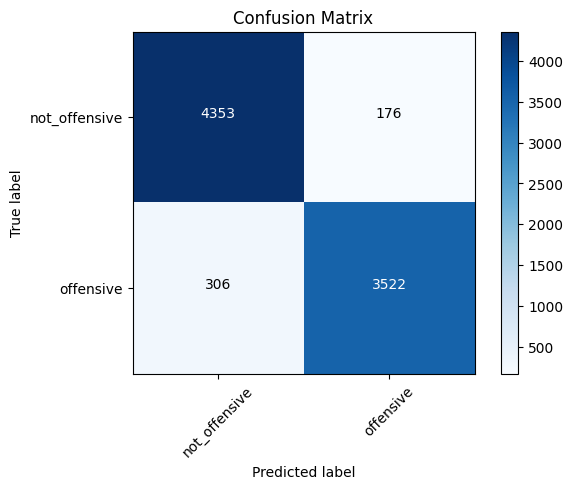

In [191]:
# To plot confusion matrix for custom model
plot_confusion_matrix(cm=svm_cm, classes=labels)

### Deep Neural Network Models

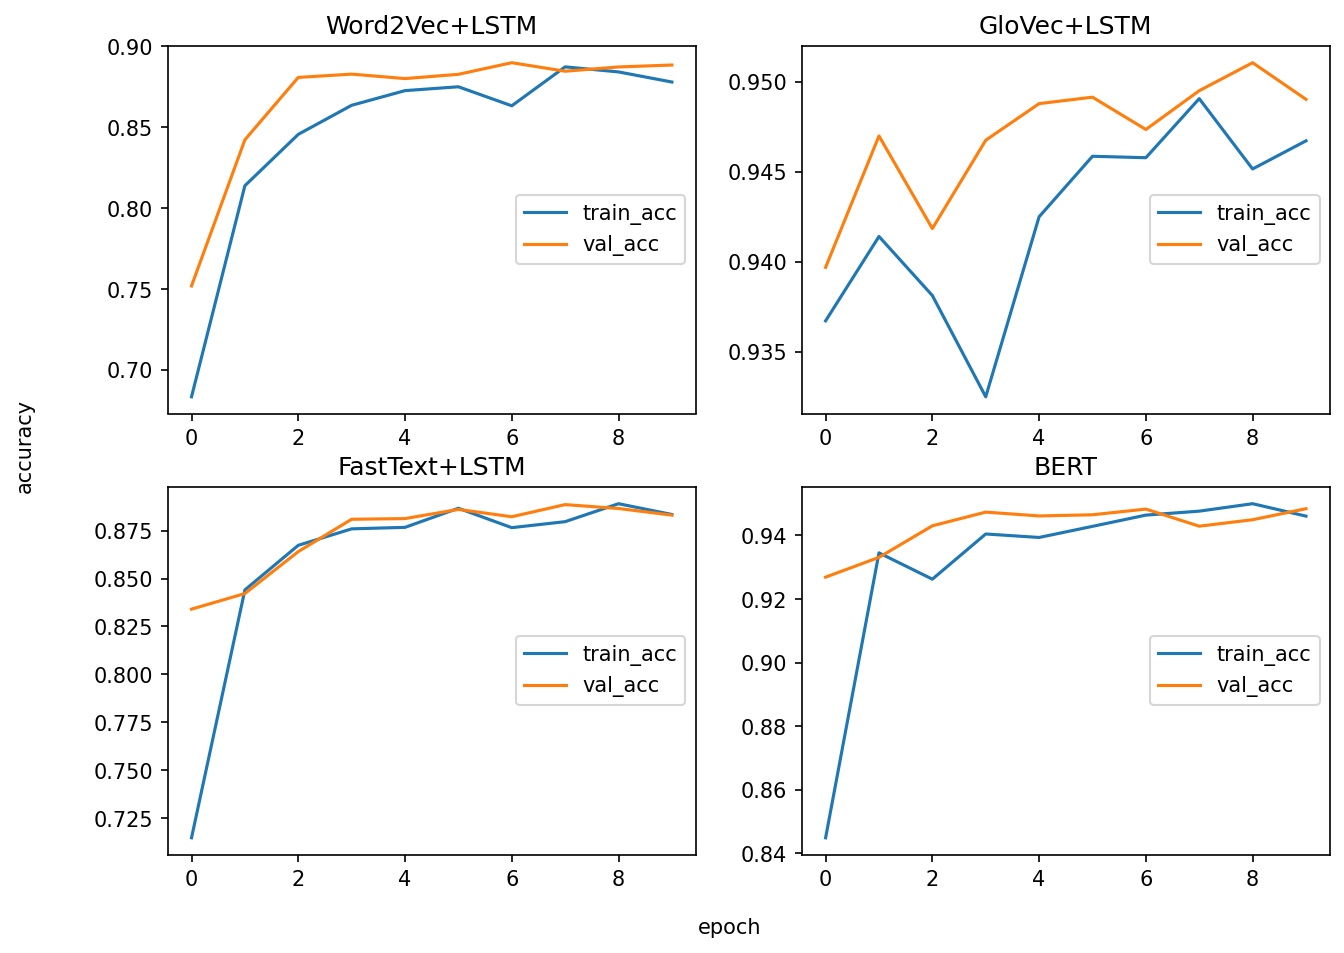

In [192]:
# plot train and validation accuracy across epochs
fig = plt.figure(dpi=150, figsize = (10,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(lstm_hist1.history['accuracy'], label='train_acc')
ax1.plot(lstm_hist1.history['val_accuracy'], label = 'val_acc')
ax1.legend(loc='center right')
ax2.plot(lstm_hist2.history['accuracy'], label='train_acc')
ax2.plot(lstm_hist2.history['val_accuracy'], label = 'val_acc')
ax2.legend(loc='center right')
ax3.plot(lstm_hist3.history['accuracy'], label='train_acc')
ax3.plot(lstm_hist3.history['val_accuracy'], label = 'val_acc')
ax3.legend(loc='center right')
ax4.plot(bert_hist.history['accuracy'], label='train_acc')
ax4.plot(bert_hist.history['val_accuracy'], label = 'val_acc')
ax4.legend(loc='center right')


fig.text(0.5, 0.04, 'epoch', ha='center', va='center')
fig.text(0.03, 0.5, 'accuracy', ha='center', va='center', rotation='vertical')

ax1.set_title('Word2Vec+LSTM')
ax2.set_title('GloVec+LSTM')
ax3.set_title('FastText+LSTM')
ax4.set_title('BERT')
plt.show()

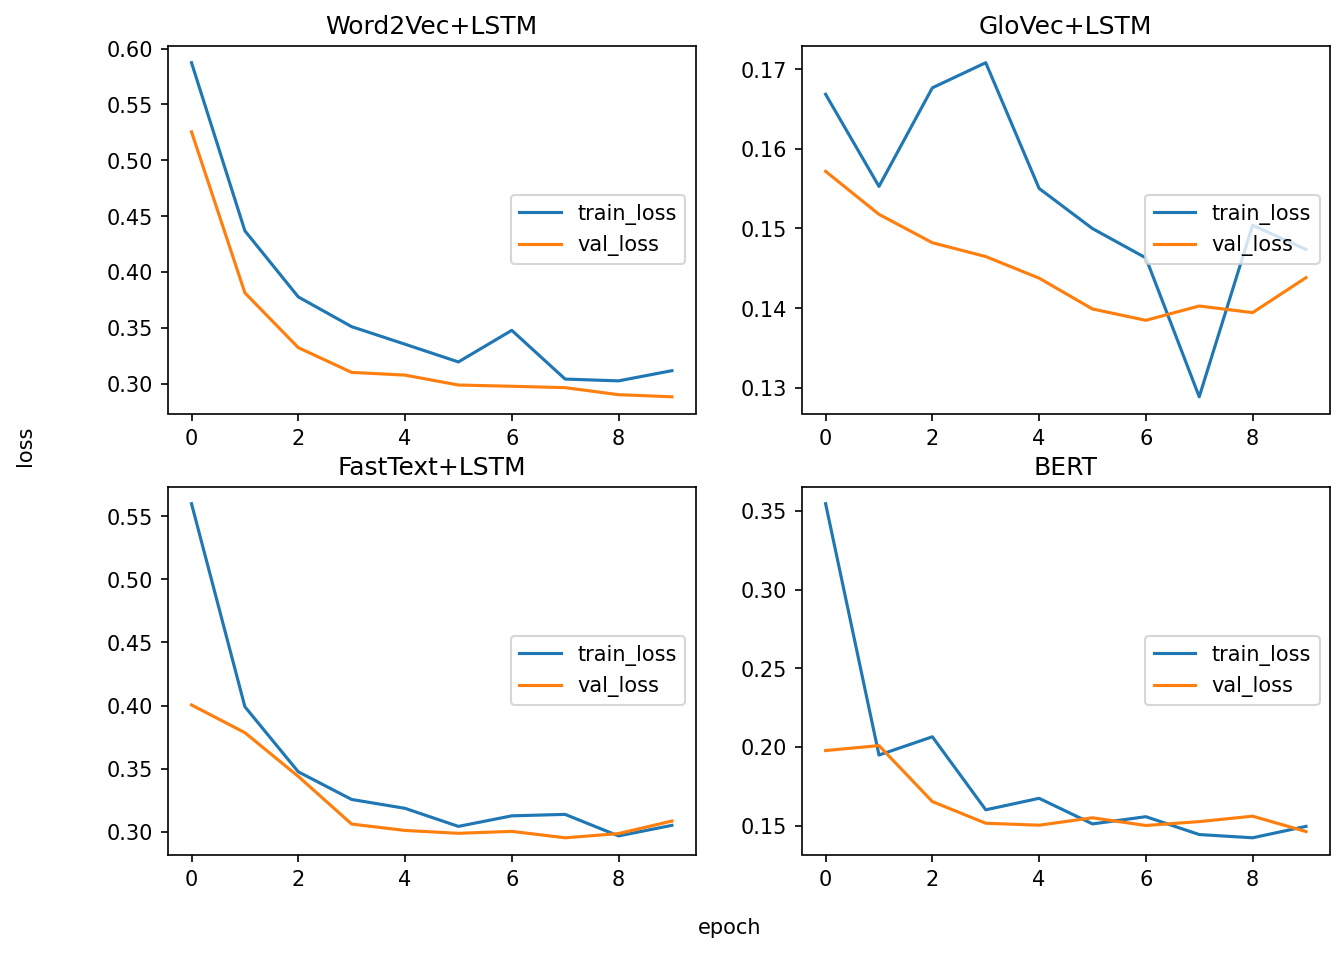

In [193]:
# Plot train and validation loss across epochs
fig = plt.figure(dpi=150, figsize = (10,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(lstm_hist1.history['loss'], label='train_loss')
ax1.plot(lstm_hist1.history['val_loss'], label = 'val_loss')
ax1.legend(loc='center right')
ax2.plot(lstm_hist2.history['loss'], label='train_loss')
ax2.plot(lstm_hist2.history['val_loss'], label = 'val_loss')
ax2.legend(loc='center right')
ax3.plot(lstm_hist3.history['loss'], label='train_loss')
ax3.plot(lstm_hist3.history['val_loss'], label = 'val_loss')
ax3.legend(loc='center right')
ax4.plot(bert_hist.history['loss'], label='train_loss')
ax4.plot(bert_hist.history['val_loss'], label = 'val_loss')
ax4.legend(loc='center right')

fig.text(0.5, 0.04, 'epoch', ha='center', va='center')
fig.text(0.03, 0.5, 'loss', ha='center', va='center', rotation='vertical')

ax1.set_title('Word2Vec+LSTM')
ax2.set_title('GloVec+LSTM')
ax3.set_title('FastText+LSTM')
ax4.set_title('BERT')
plt.show()

### BiLSTM

In [194]:
# Model Prediction: BiLSTM1
lstm1_pred = lstm1.predict(x=x_test1, verbose=0)

#get argmax of predictions
lstm1_pred = np.argmax(lstm1_pred, axis=1)

#get argmax of actuals
y_test_argmax =np.argmax(y_test1, axis=1)

In [195]:
# Generate the Classification Report
print(classification_report(y_true=y_test_argmax, y_pred=lstm1_pred, target_names=labels))

               precision    recall  f1-score   support

not_offensive       0.86      0.95      0.90      4529
    offensive       0.93      0.82      0.87      3828

     accuracy                           0.89      8357
    macro avg       0.90      0.88      0.89      8357
 weighted avg       0.89      0.89      0.89      8357



In [196]:
# Confusion Matrix
lstm1_cm =confusion_matrix(y_test_argmax, lstm1_pred)

confusion matrix, without Normalized
[[4303  226]
 [ 706 3122]]


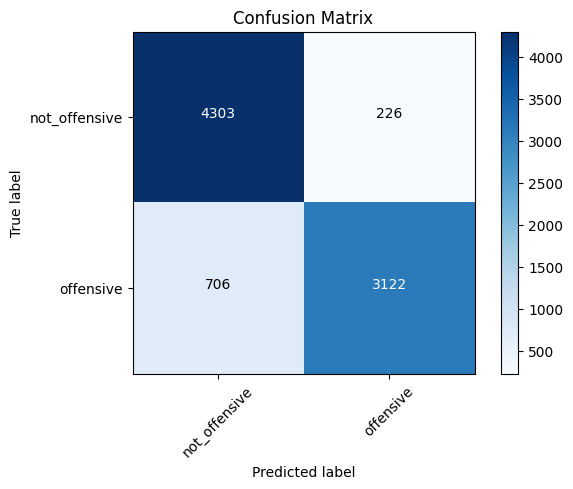

In [197]:
# Plot confusion matrix for custom model
plot_confusion_matrix(cm=lstm1_cm, classes=labels)

#### Model prediction: BiLSTM2

In [198]:
lstm2_pred = lstm2.predict(x=x_test2, verbose=0)

#get argmax of predictions
lstm2_pred = np.argmax(lstm2_pred, axis=1)

#get argmax of actuals
y_test_argmax =np.argmax(y_test2, axis=1)

In [199]:
# Generate Classification Report
print(classification_report(y_true=y_test_argmax, y_pred=lstm2_pred, target_names=labels))

               precision    recall  f1-score   support

not_offensive       0.96      0.95      0.95      4529
    offensive       0.94      0.95      0.94      3828

     accuracy                           0.95      8357
    macro avg       0.95      0.95      0.95      8357
 weighted avg       0.95      0.95      0.95      8357



confusion matrix, without Normalized
[[4301  228]
 [ 198 3630]]


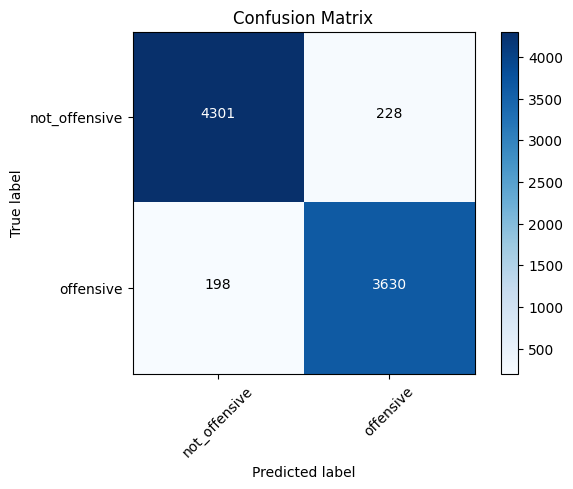

In [200]:
# Monfusion matrix
lstm2_cm =confusion_matrix(y_test_argmax, lstm2_pred)

# Plot Confusion Matrix for Custom Model
plot_confusion_matrix(cm=lstm2_cm, classes=labels)

#### Model Prediction: BiLSTM3

In [201]:
lstm3_pred = lstm3.predict(x=x_test3, verbose=0)

#get argmax of predictions
lstm3_pred = np.argmax(lstm3_pred, axis=1)

#get argmax of actuals
y_test_argmax =np.argmax(y_test3, axis=1)

In [202]:
# Generate Classification Report
print(classification_report(y_true=y_test_argmax, y_pred=lstm3_pred, target_names=labels))

               precision    recall  f1-score   support

not_offensive       0.84      0.97      0.90      4529
    offensive       0.96      0.78      0.86      3828

     accuracy                           0.88      8357
    macro avg       0.90      0.88      0.88      8357
 weighted avg       0.89      0.88      0.88      8357



confusion matrix, without Normalized
[[4397  132]
 [ 845 2983]]


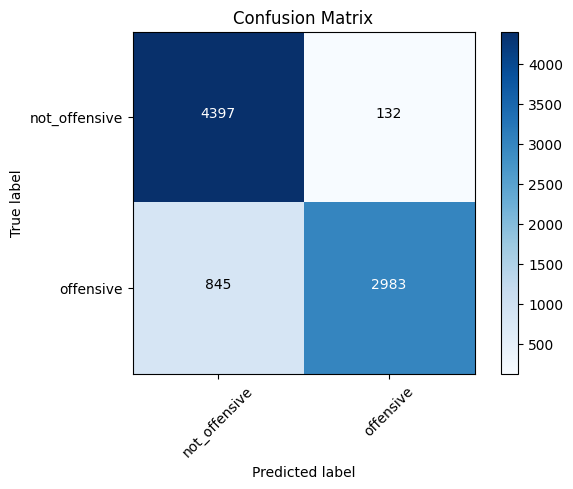

In [203]:
# Confusion Matrix
lstm3_cm =confusion_matrix(y_test_argmax, lstm3_pred)

# Plot Confusion Matrix for Custom Model
plot_confusion_matrix(cm=lstm3_cm, classes=labels)

### BERT

In [205]:
# Model Prediction: BERT
bert_pred = Bert.predict(x=x_test4, verbose=0)

# get argmax of predictions
bert_pred = np.argmax(bert_pred, axis=1)

# get argmax of actuals
y_test_argmax =np.argmax(y_test4, axis=1)

In [206]:
# Generate Classification report
print(classification_report(y_true=y_test_argmax, y_pred=bert_pred, target_names=labels))

               precision    recall  f1-score   support

not_offensive       0.96      0.94      0.95      4529
    offensive       0.93      0.96      0.94      3828

     accuracy                           0.95      8357
    macro avg       0.95      0.95      0.95      8357
 weighted avg       0.95      0.95      0.95      8357



confusion matrix, without Normalized
[[4259  270]
 [ 161 3667]]


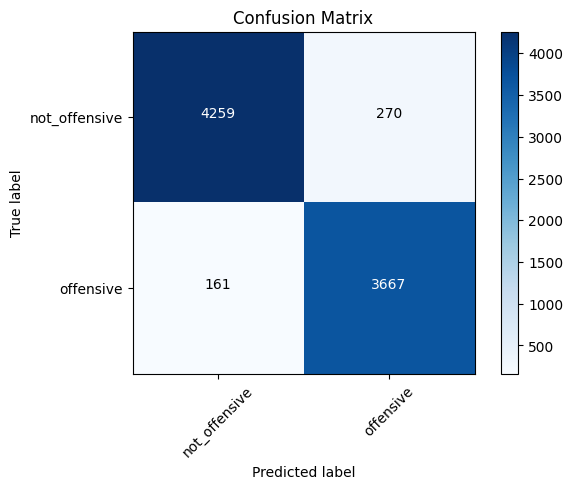

In [207]:
# Confusion Matrix
bert_cm =confusion_matrix(y_test_argmax, bert_pred)

# Plot Confusion Matrix for Custom Model
plot_confusion_matrix(cm=bert_cm, classes=labels)

### Comparing the Models

In [209]:
# Compare Models
w2v_acc, w2v_loss = lstm1.evaluate(x_test1, y_test1, batch_size=64)
glove_acc, glove_loss = lstm2.evaluate(x_test2, y_test2, batch_size=64)
ft_acc, ft_loss = lstm3.evaluate(x_test3, y_test3, batch_size=64)
bert_acc, bert_loss = Bert.evaluate(x_test4, y_test4, batch_size=64)

131/131 [==============================] - 29s 221ms/step - loss: 0.1463 - accuracy: 0.9484


In [210]:
# Parse the Accuracies to Dataframe
Model_Acc_df = pd.DataFrame({'word2vec':[w2v_acc, w2v_loss],
                             'glove':[glove_acc,glove_loss],
                             'fasttext':[ft_acc,ft_loss],
                             'BERT':[bert_acc,bert_loss]}, index=['loss','accuracy'])

Model_Acc_df

,word2vec,glove,fasttext,BERT
loss,0.288097,0.143821,0.308650,0.146270
accuracy,0.888477,0.949025,0.883092,0.948426


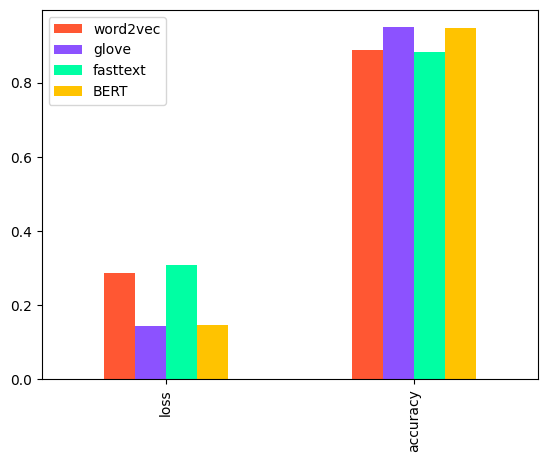

In [211]:
# Plot the values
Model_Acc_df.plot.bar(color = ['#FF5733', '#8C52FF', '#00FFA3', '#FFC300'])

plt.show()

### Testing the Models

In [215]:
def predict_post(text):
    
    #clean text
    cleaned_text = Clean_Text(text)

    #get prediction
    pred = Bert.predict([cleaned_text], verbose=0)

    labels = le.classes_
    return labels[np.argmax(pred)]

In [216]:
text = 'bitch'

In [217]:
predict_post(text)

'offensive'

In [218]:
text2 = 'dirty'

In [219]:
predict_post(text2)

'not_offensive'

In [220]:
text3 ='lost'

In [221]:
predict_post(text3)

'not_offensive'

In [222]:
predict_post('stop acting like a fucking idiot')

'offensive'

In [223]:
predict_post('nigga')

'offensive'